## Intro to Epipolar Geo and Stereo Vision

Have you ever wondered why you can experience that wonderful 3D effect when you watch a movie with those special 3D glasses?

Or why is it difficult to catch a cricket ball with your one eye closed?

It all relates to stereoscopic vision, which is our ability to perceive depth using both the eyes.

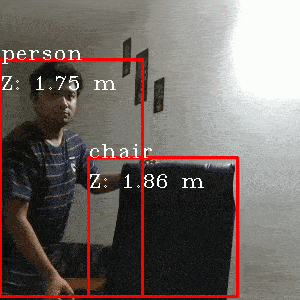

What is a stereo camera setup?

How do we use it to provide a sense of depth to a computer?

Does it have anything to do with stereoscopic vision?

Most of the post’s theoretical explanations are inspired by the book: **Multiple View Geometry in Computer Vision by Richard Hartley and Andrew Zisserman**. It is a very famous and standard textbook for understanding various fundamental concepts of computer vision.

## Do we need more than one image to calculate depth? (Triangulation)
When we capture (project) a 3D object in an image, we are projecting it from a 3D space to a 2D (planar) projective space. This is called the Planar Projection. The problem is that we lose the depth information due to this planar projection.

So how do we recover the depth? Can we calculate back the depth of a scene using a single image? Let’s try a simple example.

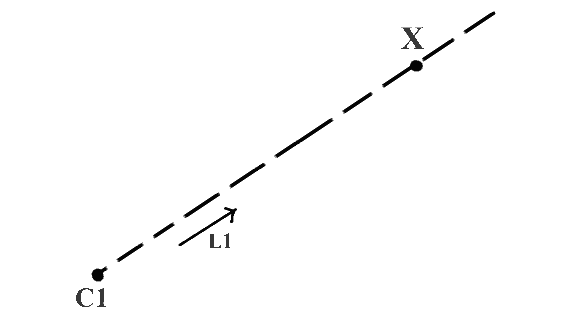

Figure 1 – Locating a 3D point (X), at an unknown depth, with a single known 3D point (C1) and direction vector (L1).

In figure 1, C1 and X are points in 3D space, and the unit vector L1 gives the direction of the ray from C1 through X. Now, can we find X if we know the values of point C1 and direction vector L1? Mathematically it simply means to solve for X in the equation

 X = C1 + k(L1)

Now, as the value of k is not known, we cannot find a unique value of X.

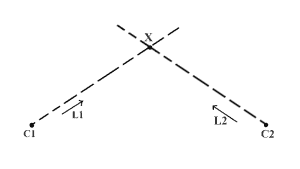

Figure 2 – Locating a 3D point (X), at an unknown depth, with two known 3D points (C1 and C2) and direction vectors (L1 and L2) – Triangulation.

In figure 2, we have an additional point C2, and L2 is the direction vector of the ray from C2 through X. Now can we find a unique value for X if C2 and L2 are also known to us?

Yes! Because the rays originating from C1 and C2 clearly intersect at a unique point, point X itself. This is called **triangulation**. We say we triangulated point X.

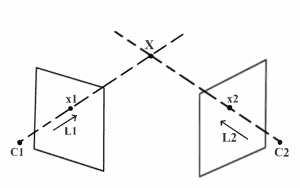

Figure 3 – Extending the triangulation concept to explain how a 3D point (X) captured in two images can be calculated if the camera positions (C1 and C2) and pixel coordinates (x1 and x2) are known.

Figure 3 shows how triangulation can be used to calculate the depth of a point (X) when captured(projected) in two different views(images). In this figure, C1 and C2 are known 3D positions of the left and right cameras, respectively. x1 is the image of the 3D point X captured by the left camera, and x2 is the image of X captured by the right camera. x1 and x2 are called corresponding points because they are the projection of the same 3D point. We use x1 and C1 to find L1 and x2 and C2 to find L2. Hence we can use triangulation to find X just like we did for figure 2.

From the above example, we learned that to triangulate a 3D point using two images capturing it from different views, the key requirements are:

- Position of the cameras – C1 and C2.
- Point correspondence – x1 and x2.

Great! It is now clear that we need more than one image to find depth.

Hey! but this was just a single 3D point that we tried to calculate. How do we calculate a 3D structure of a real-world scene by capturing it from two different views? The obvious answer is by repeating the above process for all the 3D points captured in both the views. Let’s have a closer look at the practical challenges in doing this. Time for the reality check!

### Practical and theoretical understanding of the two-view geometry

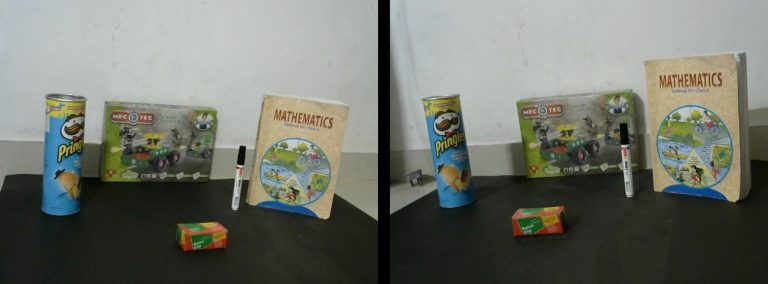


Real world scene captured from two different view points
Figure 4 – Real world scene captured from two different view points.
Figure 4 shows two images capturing a real-world scene from different viewpoints. To calculate the 3D structure, we try to find the two key requirements mentioned before:

The position of cameras in the real world coordinate system (C1 and C2). We simplify this problem by calculating the 3D points by assuming one of the camera positions (C1 or C2) as the origin. We find it by calibrating the two view system using a known calibration pattern. This process is called stereo calibration.
2. The point correspondence (x1 and x2) for each 3D point (X) in the scene to be calculated. We will discuss various improvements for calculating point correspondence and finally understand how epipolar geometry can help us to simplify the problem.

Note that the stereo camera calibration is useful only when the images are captured by a pair of cameras rigidly fixed with respect to each other. If a single camera captures the images from two different angles, then we can find depth only to a scale. The absolute depth is unknown unless we have some special geometric information about the captured scene that can be used to find the actual scale.

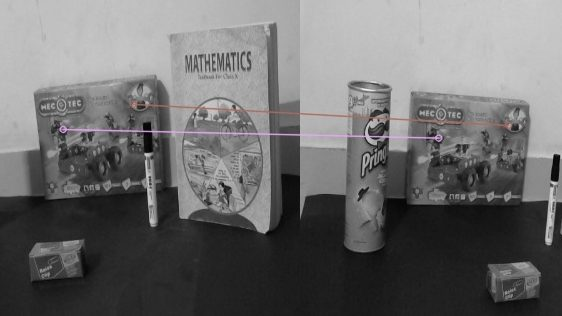


Hand picked feature matches
Figure 5 – Hand picked feature matches.
Figure 5 shows different matched points that were manually marked. It is easy for us to identify the corresponding points, but how do we make a computer do that?

One method which people regularly use in the computer vision community is called feature matching. Following figure 6 shows matched features between the left and right images using ORB feature descriptors. This is one method to find point correspondence (matches).

Feature Matching -output

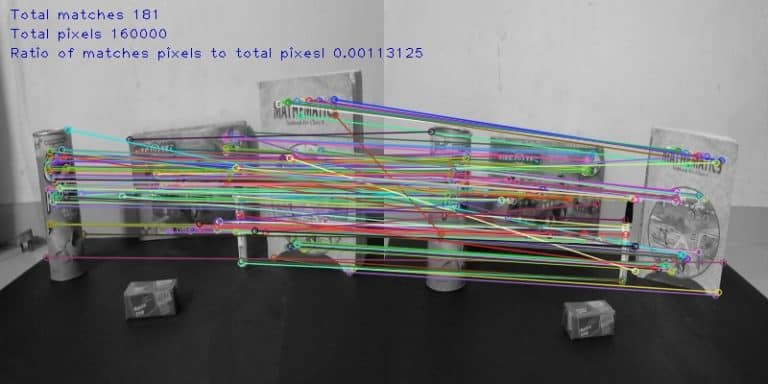


Figure 6 – Results of feature detection algorithm.
However, we observe that the ratio of the number of pixels with known point correspondence to the total number of pixels is minimal. This means we will have a very sparsely reconstructed 3D scene. For dense reconstruction, we need to obtain point correspondence for the maximum number of pixels possible.  

Multiple matched points using template matching

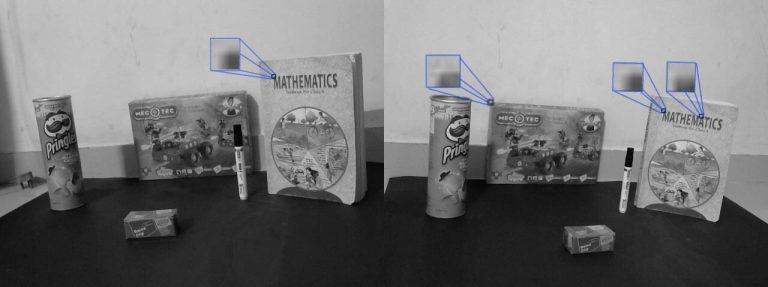


Figure 7 – Multiple matched points using template matching.
A simplified way to find the point correspondences is to find pixels with similar neighboring pixel information. In figure 7, we observe that using this method of matching pixels with similar neighboring information results in a single-pixel from one image having multiple matches in the other image. We find it challenging to write an algorithm to determine the true match.

Is there a way to reduce our search space? Some theorem which we can use to eliminate all the extra false matches that lead to inaccurate correspondence? We make use of epipolar geometry here.

All this explanation and build-up was to introduce the concept of epipolar geometry. Now we will understand the importance of epipolar geometry in reducing search space for point correspondence.

### Epipolar geometry and its use in point correspondence

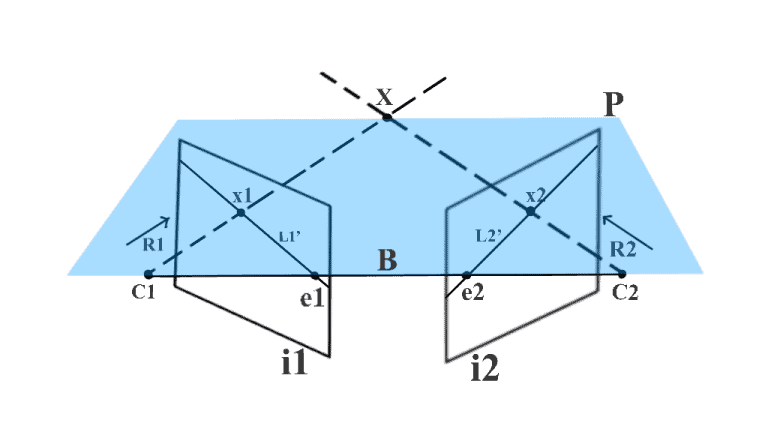

In figure 8, we assume a similar setup to figure 3. A 3D point X is captured at x1 and x2 by cameras at C1 and C2, respectively. As x1 is the projection of X, If we try to extend a ray R1 from C1 that passes through x1, it should also pass through X. This ray R1 is captured as line L2, and X is captured as x2 in the image i2. As X lies on R1, x2 should lie on L2. This way, the possible location of x2 is constrained to a single line, and hence we can say that the search space for a pixel in image i2, corresponding to pixel x1, is reduced to a single line L2. We use epipolar geometry to find L2.

Time to define some technical terms now! Along with X, we can also project the camera centers in the respective opposite images. e2 is the projection of camera center C1 in image i2, and e1 is the projection of camera center C2 in image i1. The technical term for e1 and e2 is epipole. Hence in a two-view geometry setup, an epipole is the image of the camera center of one view in the other view.

The line joining the two camera centers is called a baseline. Hence epipole can also be defined as the intersection of baseline with the image plane.

Figure 8 shows that using R1 and baseline, we can define a plane P. This plane also contains X, C1, x1, x2, and C2. We call this plane the epipolar plane. Furthermore, the line obtained from the intersection of the epipolar plane and the image plane is called the epipolar line. Hence in our example, L2 is an epipolar line. For different values of X, we will have different epipolar planes and hence different epipolar lines. However, all the epipolar planes intersect at baseline, and all the epipolar lines intersect at epipole. All this together forms the epipolar geometry.

Revisiting figure 8 with all the technical terms we have learned till now.

We have epipolar plane P created using baseline B and ray R1. e1 and e2 are epipoles, and L2 is the epipolar line. Based on the epipolar geometry of the given figure, search space for pixel in image i2 corresponding to pixel x1 is constrained to a single 2D line which is the epipolar line l2. This is called the epipolar constraint.

Is there a way to represent the entire epipolar geometry by a single matrix? Furthermore, can we calculate this matrix using just the two captured images? The good news is that there is such a matrix, and it is called the Fundamental matrix.

In the next two sections, we first understand what we mean by projective geometry and homogeneous representation and then try to derive the Fundamental matrix expression. Finally, we calculate the epipolar lines and represent the epipolar constraint by using the fundamental matrix.

### Understanding projective geometry and homogeneous representation

How do we represent a line in a 2D plane? Equation of a line in a 2D plane is ax + by + c = 0. With different values of a, b, and c, we get different lines in a 2D plane. Hence a vector (a,b,c) can be used to represent a line.

Suppose we have line ln1 defined as 2x + 3y + 7 = 0 and line ln2 as 4x + 6y + 14 = 0. Based on our above discussion, l1 can be represented by the vector (2,3,7) and l2 by the vector (4,6,14). We can easily say that l1 and l2 essentially represent the same line and that the vector (4,6,14) is basically the scaled version of the vector (2,3,7), scaled by a factor of 2.

Hence any two vectors (a,b,c) and k(a,b,c), where k is a non-zero scaling constant, represent the same line. Such equivalent vectors, which are related by just a scaling constant, form a class of homogeneous vectors. The vector (a,b,c) is the homogeneous representation of its respective equivalent vector class.

The set of all equivalent classes, represented by (a,b,c), for all possible real values of a, b, and c other than a=b=c=0, forms the projective space. We use the homogeneous representation of homogeneous coordinates to define elements like points, lines, planes, etc., in projective space. We use the rules of projective geometry to perform any transformations on these elements in the projective space.

Fundamental matrix derivation
In figure 3, Assume that we know the camera projection matrices for both the cameras, say P1 for the camera at C1 and P2 for the camera at C2.

What is a projection matrix? The camera’s projection matrix defines the relation between the 3D world coordinates and their corresponding pixel coordinates when captured by the camera. To know more about the camera projection matrix, read this post on camera calibration.  

Just like P1 projects 3D world coordinates to image coordinates, we define P1inv, the pseudo inverse of P1, such that we can define the ray R1 from C1 passing through x1 and X as:

 X(k) = P1inv \times x1 + kC1
k is a scaling parameter as we do not know the actual distance of X from C1. We need to find the epipolar line Ln2 to reduce the search space for a pixel in i2 corresponding to pixel x1 in i1 as we know that Ln2 is the image of ray R1 captured in i2. Hence to calculate Ln2, we first find two points on ray R1, project them in image i2 using P2 and use the projected images of the two points to find Ln2.

The first point that we can consider on R1 is C1, as the ray starts from this point. The second point can be calculated by keeping k=0. Hence we get the points as C1 and (P1inv)(x1).

Using the projection matrix P2 we get the image coordinates of these points in the image i2 as P2*C1 and P2*P1inv*x1 respectively. We also observe that P2*C1 is basically the epipole e2 in image i2.

A line can be defined in projective geometry using two points p1 and p2 by simply finding their cross product p1 x p2. Hence

  Ln2 = P2 * C1 \times P2 * P1inv * x1 \\  as \; e2 = P2 * C1 \\  \therefore Ln2 = e2 \times P2 * P1inv * x1 \\  F = e2 \times P2 * P1inv  \; (The fundamental matrix) \\  \therefore Ln2  = F*x1
In projective geometry, if a point x lies on a line L, we can write it in the form of the equation

 x^T \times L = 0
Hence, as x2 lies on the epipolar line Ln2, we get

 x2^T \times Ln2 = 0
By replacing the value of Ln2 from the above equation, we get the equation:

 x2^T \times F \times x1 = 0
This is a necessary condition for the two points x1 and x2 to be corresponding points, and it is also a form of epipolar constraint. Thus F represents the overall epipolar geometry of the two-view system.

What else is so special about this equation? It can be used to find the epipolar lines!

Using Fundamental matrix to find epipolar lines
As x1 and x2 are corresponding points in the equation, if we can find correspondence for some points, using feature matching methods like ORB or SIFT, we can use them to solve the above equation for F.

The findFundamentalMat() method of OpenCV provides implementations of various algorithms, like 7-Point Algorithm, 8-Point Algorithm, RANSAC algorithm, and LMedS Algorithm, to calculate Fundamental matrix using matched feature points.

Once F is known, we can find the epipolar line Ln2  using the formula

 Ln2 = F * x1
If we know Ln2, we can restrict our search for pixel x2 corresponding to pixel x1 using the epipolar constraint.

### A special case of two-view vision – parallel imaging planes
We have been trying to solve the correspondence problem. We started by using feature matching, but we observed that it leads to a sparse 3D structure, as the point correspondence for a tiny fraction of the total pixels is known. Then we saw how we could use a template-based search for pixel correspondence. We learned how epipolar geometry could be used to reduce the search space for point correspondence to a single line – the epipolar line.

Can we simplify this process of finding dense point correspondences even further?

Figure 9 and Figure 10 show the feature matching results and epipolar line constraint for two different pairs of images. What is the most significant difference between the two figures in terms of feature matching and the epipolar lines?

Yes! You got it right! The matched feature points have equal vertical coordinates in Figure 10. All the corresponding points have equal vertical coordinates. All the epipolar lines in Figure 10 have to be parallel and have the same vertical coordinate as the respective point in the left image. Well, what is so great about that?

Exactly! Unlike the case of figure 9, there is no need to calculate each epipolar line explicitly. If the pixel in the left image is at (x1,y1), the equation of the respective epipolar line in the second image is y=y1.

We search for each pixel in the left image for its corresponding pixel in the same row of the right image. This is a special case of two-view geometry where the imaging planes are parallel. Hence, the epipoles (image of one camera captured by the other camera) form at infinity. Based on our understanding of epipolar geometry, epipolar lines meet at epipoles. Hence in this case, as the epipoles are at infinity, our epipolar lines are parallel.

Awesome! This significantly simplifies the problem of dense point correspondence. However, we still have to perform triangulation for each point. Can we simplify this problem as well? Well, once again, the special case of parallel imaging planes has good news for us! It helps us to apply stereo disparity. It is similar to stereopsis or stereoscopic vision, the method that helps humans perceive depth. Let’s understand this in detail.

Understanding stereo disparity
The following gif is generated using images from the Middlebury Stereo Datasets 2005. It demonstrates the pure translation motion of the camera, making the imaging planes parallel. Can you tell which objects are closer to the camera?

We can clearly say that the toy cow at the bottom is closer to the camera than the toys in the topmost row. How did we do this? We basically see the shift in the object in the two images. The more the shift closer is the object. This shift is what we call as disparity.  

How do we use it to avoid point triangulation for calculating depth? We calculate the disparity (shift of the pixel in the two images) for each pixel and apply a proportional mapping to find the depth for a given disparity value. This is further justified in figure 12.

Disparity = x – x’ = Bf/Z

Where B is the baseline (Distance between the cameras), and f is the focal length.

We will use a StereoSGBM method of OpenCV to write a code for calculating the disparity map for a given pair of images. The StereoSGBM method is based on [3].


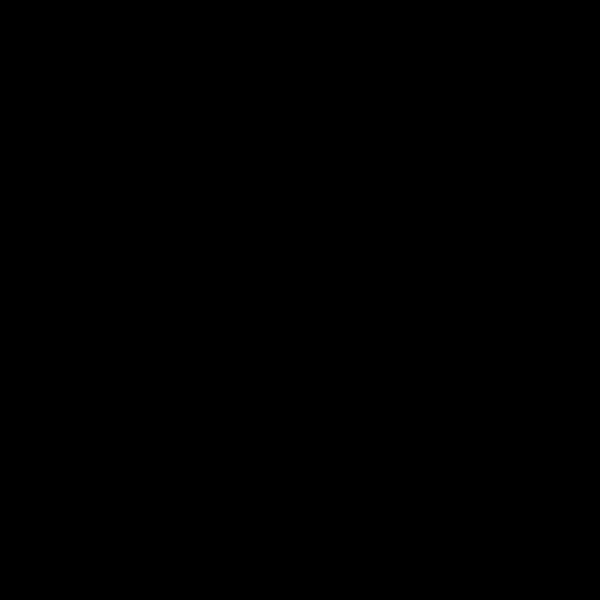

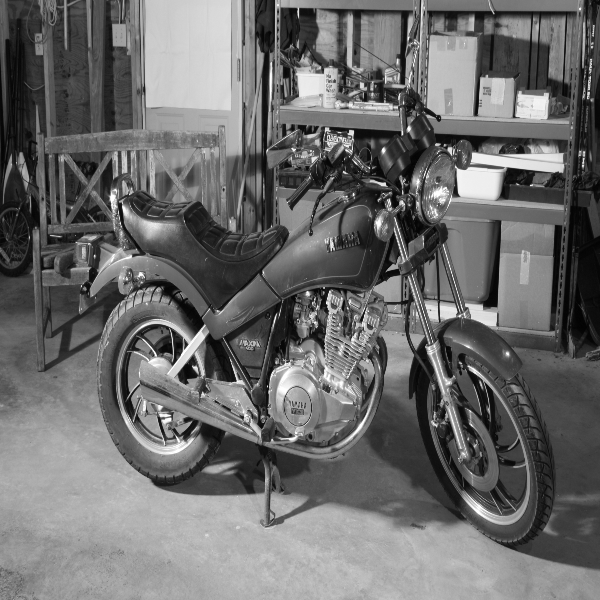

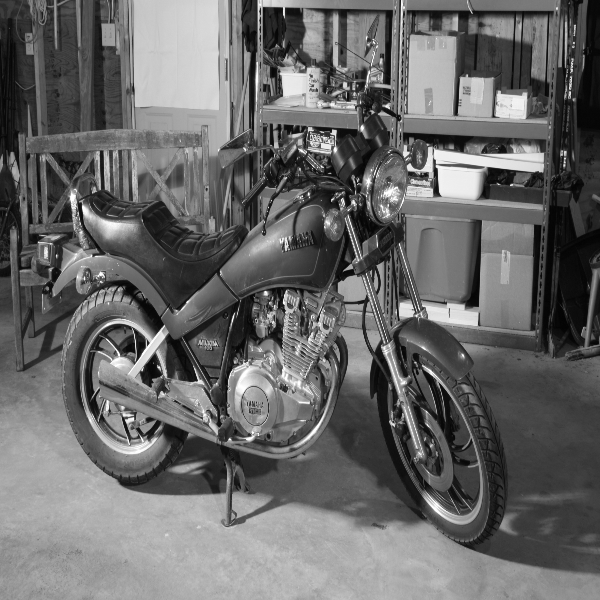

In [ ]:
from __future__ import print_function
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def main():
    imgL = cv2.imread("/content/im0.png",0)
    imgL = cv2.resize(imgL,(600,600))

    imgR = cv2.imread("/content/im1.png",0)
    imgR = cv2.resize(imgR,(600,600))

    # Setting parameters for StereoSGBM algorithm
    minDisparity = 0
    numDisparities = 64
    blockSize = 8
    disp12MaxDiff = 1
    uniquenessRatio = 10
    speckleWindowSize = 10
    speckleRange = 8

    # Creating an object of StereoSGBM algorithm
    stereo = cv2.StereoSGBM_create(minDisparity = minDisparity,
        numDisparities = numDisparities,
        blockSize = blockSize,
        disp12MaxDiff = disp12MaxDiff,
        uniquenessRatio = uniquenessRatio,
        speckleWindowSize = speckleWindowSize,
        speckleRange = speckleRange
    )

    # Calculating disparith using the StereoSGBM algorithm
    disp = stereo.compute(imgL, imgR).astype(np.float32)

    # Calculating disparith using the StereoSGBM algorithm
    disp = cv2.normalize(disp,0,255,cv2.NORM_MINMAX)

    # Displaying the disparity map
    cv2_imshow(disp)#"disparity",
    cv2_imshow(imgL)#"left image",
    cv2_imshow(imgR)#"right image",
    cv2.waitKey(0)


if __name__ == '__main__':
    main()
    cv2.destroyAllWindows()